This notebook shows the derivation and application of multiple linear regression with linear coefficients.  Using a sample data with 2 features and 25 samples, a quick demonstrations of the matrix and use of Python libraries.  

One of the first libraries to explore is to visualize data using [pair plots](https://seaborn.pydata.org/tutorial/axis_grids.html) with Seaborn (bottom of the link) and also [scatter matrices](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.scatter_matrix.html#pandas.plotting.scatter_matrix) in Pandas (Pandas term for pair plots).  This step is important to inspect the data prior to any further analysis but after data cleaning.  In this way, the examination will provide insights into what the data is before embarking on analysis that might lead to a wrong conclusion.   

The next library is Numpy using the array class to compute matrices.  The methods used to place the matrix in the right order:  
- np.to_numpy  
- np.concatenate  
- np.reshape  

The next library is scipy.  This will use the matrix inversion code to calculate the least-square estimator.  scipy is recommended over numpy for better computing efficiency.  Scipy will also be used for analysis.

Finally, statsmodel will be used as the main tool for analysis.


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")       # default seaborn settings
from scipy import linalg
import statsmodels.api as sm

In [3]:
import os, sys
os.path.abspath(os.path.dirname(sys.argv[0]))
os.chdir('D:\\aiML\\Linear_Regression')
os.getcwd()
file='D:\\aiML\\Linear_Regression\\linear_regression_5e_data_sets\\Chapter_3\\Examples\\data-ex-3-1_Delivery_Time.xls'

In [4]:
# read the file and set the row name, index, to the first column of the data
df = pd.read_excel(file, index_col='Observation')

In [5]:
# quick view of the imported data
df.head()

,"Delivery Time, y","Number of Cases, x1","Distance, x2 (ft)"
Observation,,,
1,16.68,7,560
2,11.50,3,220
3,12.03,3,340
4,14.88,4,80
5,13.75,6,150


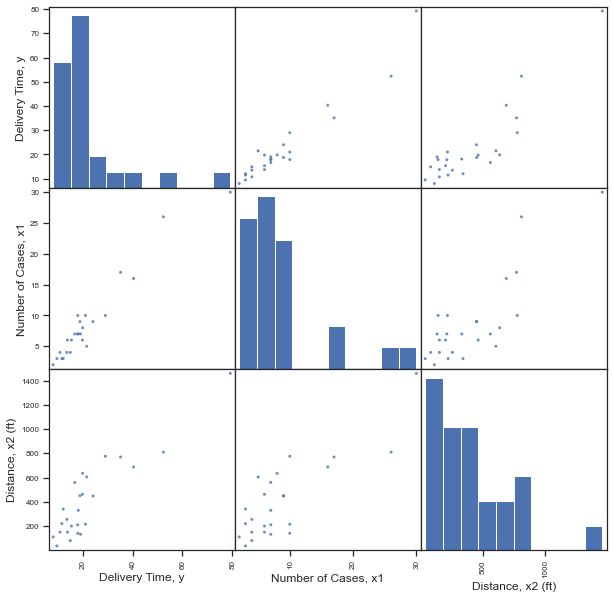

In [6]:
# Visualization of the data using pair plots. 
# Using Panda's plotting.scatter_matrix
pd.plotting.scatter_matrix(df, alpha=0.8, figsize=(10,10));

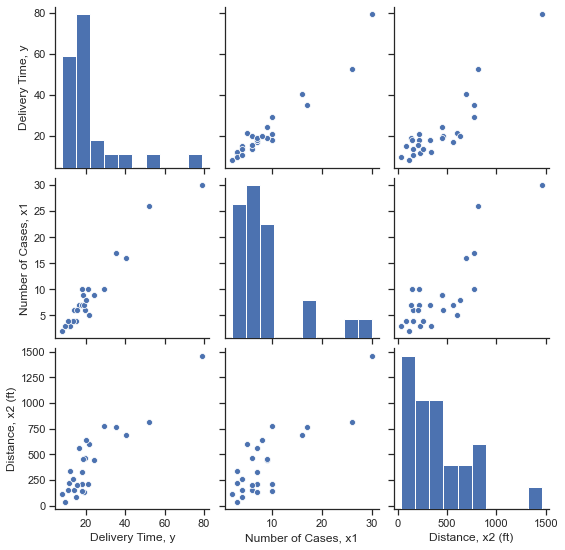

In [7]:
# Using seaborn.
sns.pairplot(df)
plt.show()

In [8]:
# To setup the matrices to find the least-squares fit, identify the columns.
df.columns

Index(['Delivery Time, y', 'Number of Cases, x1', 'Distance, x2 (ft)'], dtype='object')

The pairs plot shows linear but also that the feature variables are independent of each other.  These 2 ideas would be important to assess the data.

This will now leave the dataframe and transition to numpy arrays to calculate the equivalent of matrices.  Transform the dataframe with the number of samples into an intermediate variable.  Create a final matrix of row,column size based on the number of features against the response variable.
- to_numpy()
- np.concatenate()
- np.reshape()
in order to obtain the matrix of the form $X and y$.  

The reshape is needed to conform the arrays with each other in order to use concatenate.  Numpy uses arrays, not matrices so care when using one unto the other.

to_numpy() produces a shape of (row, ) where column is empty.  reshape creates an array of (row, column).


In [9]:
# Extract the feature variables and put into matrix form.
Xi = df[['Number of Cases, x1','Distance, x2 (ft)']].to_numpy()

In [10]:
np.shape(Xi)

(25, 2)

In [11]:
Xi

array([[   7,  560],
       [   3,  220],
       [   3,  340],
       [   4,   80],
       [   6,  150],
       [   7,  330],
       [   2,  110],
       [   7,  210],
       [  30, 1460],
       [   5,  605],
       [  16,  688],
       [  10,  215],
       [   4,  255],
       [   6,  462],
       [   9,  448],
       [  10,  776],
       [   6,  200],
       [   7,  132],
       [   3,   36],
       [  17,  770],
       [  10,  140],
       [  26,  810],
       [   9,  450],
       [   8,  635],
       [   4,  150]], dtype=int64)

In [12]:
X = np.concatenate( (np.ones(len(df['Delivery Time, y'])).reshape((len(df['Delivery Time, y']),1)), Xi) , axis=1) 

In [13]:
X

array([[1.00e+00, 7.00e+00, 5.60e+02],
       [1.00e+00, 3.00e+00, 2.20e+02],
       [1.00e+00, 3.00e+00, 3.40e+02],
       [1.00e+00, 4.00e+00, 8.00e+01],
       [1.00e+00, 6.00e+00, 1.50e+02],
       [1.00e+00, 7.00e+00, 3.30e+02],
       [1.00e+00, 2.00e+00, 1.10e+02],
       [1.00e+00, 7.00e+00, 2.10e+02],
       [1.00e+00, 3.00e+01, 1.46e+03],
       [1.00e+00, 5.00e+00, 6.05e+02],
       [1.00e+00, 1.60e+01, 6.88e+02],
       [1.00e+00, 1.00e+01, 2.15e+02],
       [1.00e+00, 4.00e+00, 2.55e+02],
       [1.00e+00, 6.00e+00, 4.62e+02],
       [1.00e+00, 9.00e+00, 4.48e+02],
       [1.00e+00, 1.00e+01, 7.76e+02],
       [1.00e+00, 6.00e+00, 2.00e+02],
       [1.00e+00, 7.00e+00, 1.32e+02],
       [1.00e+00, 3.00e+00, 3.60e+01],
       [1.00e+00, 1.70e+01, 7.70e+02],
       [1.00e+00, 1.00e+01, 1.40e+02],
       [1.00e+00, 2.60e+01, 8.10e+02],
       [1.00e+00, 9.00e+00, 4.50e+02],
       [1.00e+00, 8.00e+00, 6.35e+02],
       [1.00e+00, 4.00e+00, 1.50e+02]])

In [14]:
np.shape(X)

(25, 3)

In [15]:
# Prepare the target variable.
y = df['Delivery Time, y'].to_numpy()

In [16]:
y

array([16.68, 11.5 , 12.03, 14.88, 13.75, 18.11,  8.  , 17.83, 79.24,
       21.5 , 40.33, 21.  , 13.5 , 19.75, 24.  , 29.  , 15.35, 19.  ,
        9.5 , 35.1 , 17.9 , 52.32, 18.75, 19.83, 10.75])

In [17]:
np.shape(y)

(25,)

In [18]:
# Properly shape the matrix for operations, just like for X above.
y = y.reshape(25,1)

In [19]:
np.shape(y)

(25, 1)

Compute $X^{T} X$ matrix:  

Note for numpy, the use of .dot method for array multiplications.

In [20]:
# Transpose then multiply.
XtX = np.dot( X.T, X )

In [21]:
XtX

array([[2.500000e+01, 2.190000e+02, 1.023200e+04],
       [2.190000e+02, 3.055000e+03, 1.338990e+05],
       [1.023200e+04, 1.338990e+05, 6.725688e+06]])

For $X^{T} y$:

In [22]:
Xty = np.dot( X.T, y )

In [23]:
Xty

array([[   559.6 ],
       [  7375.44],
       [337071.69]])

Solving for the least-squares estimators:
$$\hat{\beta} = (X^{T}X)^{-1} X^{T}y$$

In [24]:
# inverse computation, using scipy library
X_inv = linalg.inv(XtX)

In [25]:
X_inv

array([[ 1.13215186e-01, -4.44859324e-03, -8.36725698e-05],
       [-4.44859324e-03,  2.74378329e-03, -4.78570866e-05],
       [-8.36725698e-05, -4.78570866e-05,  1.22874474e-06]])

In [26]:
# To check inverse works because inversion requires that the determinant has to exists.
# Final computation should be an identity matrix.
# The upper and lower diagonals are not exactly zero due to computing but the diagonals shows 1.
np.dot( X_inv, XtX)

array([[ 1.00000000e+00, -2.46043420e-15, -1.36699246e-13],
       [ 1.52872506e-17,  1.00000000e+00, -2.73352304e-14],
       [ 7.11507676e-20, -1.72282266e-17,  1.00000000e+00]])

In [27]:
beta_hat = np.dot( X_inv, Xty )

In [28]:
beta_hat

array([[2.34123115],
       [1.61590721],
       [0.01438483]])

So the least-squares fit estimation equation is:
$$\hat{y} = 2.34123115 + 1.61590721 * x_1 + 0.01438483 * x_2$$

### This section will now use python libraries as tool to do the analysis. ###  

The first section will use statsmodel using 2 methods: [endog-exog](https://www.statsmodels.org/dev/examples/notebooks/generated/chi2_fitting.html) and [R-stye](https://www.statsmodels.org/stable/example_formulas.html).  

The endog-exog method is similar to the [regression derivation](https://github.com/ppgiii/Regression/blob/master/MLR_readme.ipynb) where the first column of variable $X$ is filled with 1's.  These are the intercept for the estimators $\hat{\beta}$.  

The second section will utilize scipy.  For multiple regression, the optimize fitted library will be used.  

In [29]:
# use variable endog-exog
Xm = df[ ['Number of Cases, x1','Distance, x2 (ft)'] ]
ym = df['Delivery Time, y']

In [30]:
# adding the 1's
Xm = sm.add_constant(Xm)

In [31]:
model = sm.OLS(ym, Xm)
results = model.fit()
print(results.summary())

OLS Regression Results                            
Dep. Variable:       Delivery Time, y   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     261.2
Date:                Wed, 29 Jul 2020   Prob (F-statistic):           4.69e-16
Time:                        16:38:49   Log-Likelihood:                -63.415
No. Observations:                  25   AIC:                             132.8
Df Residuals:                      22   BIC:                             136.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.3412      1.097      2.135      0.04

In [33]:
# using R-style format
import statsmodels.formula.api as smf
# names/labels need to succinct
yi = df['Delivery Time, y']
xi1 = df['Number of Cases, x1']
xi2 = df['Distance, x2 (ft)']
mod = smf.ols(formula='yi ~ xi1 + xi2', data=df)
res = mod.fit()
print(res.summary())

OLS Regression Results                            
Dep. Variable:                     yi   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     261.2
Date:                Wed, 29 Jul 2020   Prob (F-statistic):           4.69e-16
Time:                        16:45:22   Log-Likelihood:                -63.415
No. Observations:                  25   AIC:                             132.8
Df Residuals:                      22   BIC:                             136.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3412      1.097      2.135      0.044       0.067       4.616
x